### **Stock Market Prediction using Numerical and Textual Analysis**

### GRIP @ The Sparks Foundation



## *ADITHIYAN RAJAN*

## *Data Science & Business Analytics Intern*

## Objective - to create a hybrid model for stock price/performance prediction using numerical analysis of historical stock prices, and sentimental analysis of news headlines.

## Dataset - LT stock data from Yahoo Finance

## Textual News data from https://bit.ly/36fFPI6.

## Stock Price Analysis and Prediction

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn import metrics 
from keras.models import Sequential
from keras.layers import Dense, LSTM
import math

In [ ]:
# Dataframe for exploratory analysis
df=pd.read_csv('/content/LT.NS2.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-07-01,40.111111,40.724445,40.111111,40.435555,30.959587,3709080.0
1,2002-07-02,40.555553,40.933334,40.444443,40.533333,31.034466,2500024.0
2,2002-07-03,40.688889,40.755554,40.022221,40.080002,30.687366,1910772.0
3,2002-07-04,40.244446,40.377777,39.835556,39.924442,30.568254,1515924.0
4,2002-07-05,39.799999,40.222221,39.799999,40.022221,30.643120,1038928.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5034 entries, 0 to 5033
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5034 non-null   object 
 1   Open       5027 non-null   float64
 2   High       5027 non-null   float64
 3   Low        5027 non-null   float64
 4   Close      5027 non-null   float64
 5   Adj Close  5027 non-null   float64
 6   Volume     5027 non-null   float64
dtypes: float64(6), object(1)
memory usage: 275.4+ KB


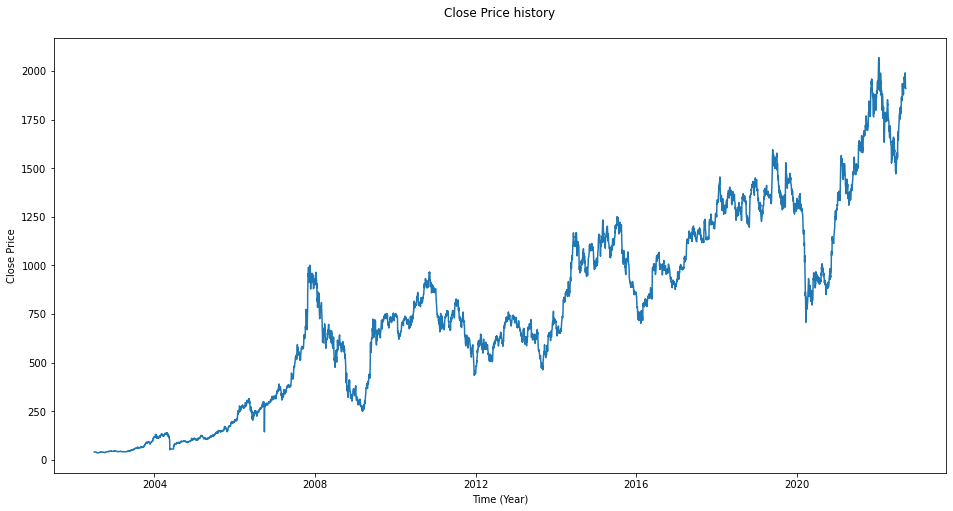

In [ ]:
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']
df.dropna(inplace=True)
#plot
plt.figure(figsize=(16,8))
plt.title('Close Price history\n')
plt.xlabel('Time (Year)')
plt.ylabel('Close Price')
plt.plot(df['Close'])

In [ ]:
# fix random seed for reproducibility
np.random.seed(5)

In [ ]:
# convert an array of values into a dataset matrix
def create_dataset(df2, look_back=1):
	dataX, dataY = [], []
	for i in range(len(df2)-look_back-1):
		a = df2[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(df2[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [ ]:
df2 = pd.read_csv('/content/LT.NS2.csv', usecols=[5], engine='python')
df2.dropna(inplace=True)
df2 = df2.values
df2 = df2.astype('float32')

In [ ]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
df2 = scaler.fit_transform(df2)

# split into train and test sets
train_size = int(len(df2) * 0.67)
test_size = len(df2) - train_size
train, test = df2[0:train_size,:], df2[train_size:len(df2),:]

In [ ]:
# reshape into X=t and Y=t+1
look_back = 2
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

In [ ]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(7, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=5, verbose=2)

Epoch 1/100
673/673 - 3s - loss: 0.0075 - 3s/epoch - 5ms/step
Epoch 2/100
673/673 - 1s - loss: 5.4377e-05 - 1s/epoch - 2ms/step
Epoch 3/100
673/673 - 1s - loss: 5.1523e-05 - 1s/epoch - 2ms/step
Epoch 4/100
673/673 - 1s - loss: 4.8664e-05 - 1s/epoch - 2ms/step
Epoch 5/100
673/673 - 1s - loss: 4.8777e-05 - 1s/epoch - 2ms/step
Epoch 6/100
673/673 - 1s - loss: 5.1464e-05 - 1s/epoch - 2ms/step
Epoch 7/100
673/673 - 1s - loss: 4.9079e-05 - 1s/epoch - 2ms/step
Epoch 8/100
673/673 - 1s - loss: 4.9345e-05 - 1s/epoch - 2ms/step
Epoch 9/100
673/673 - 1s - loss: 5.1063e-05 - 1s/epoch - 2ms/step
Epoch 10/100
673/673 - 1s - loss: 4.9859e-05 - 1s/epoch - 2ms/step
Epoch 11/100
673/673 - 1s - loss: 5.0562e-05 - 1s/epoch - 2ms/step
Epoch 12/100
673/673 - 1s - loss: 5.0193e-05 - 1s/epoch - 2ms/step
Epoch 13/100
673/673 - 1s - loss: 4.9522e-05 - 1s/epoch - 2ms/step
Epoch 14/100
673/673 - 1s - loss: 4.9244e-05 - 1s/epoch - 2ms/step
Epoch 15/100
673/673 - 1s - loss: 5.1424e-05 - 1s/epoch - 2ms/step
Epoch 16

In [ ]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

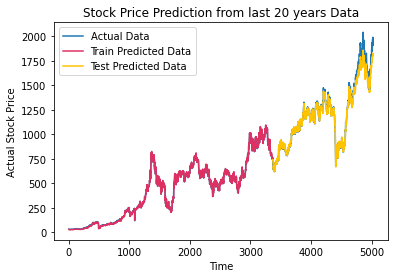

In [ ]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(df2)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df2)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(df2)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df2), label = 'Actual Data')
plt.title('Stock Price Prediction from last 20 years Data')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')
plt.plot(trainPredictPlot,color='#DE3163', label = 'Train Predicted Data')
plt.plot(testPredictPlot, color='#FFC300', label = 'Test Predicted Data')
plt.legend(loc='best')
plt.show()

In [ ]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print("Root mean square error of Training  = ",trainScore," RMSE")
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print("Root mean square error of Testing = ",testScore," RMSE")

Root mean square error of Training  =  11.79893733830435  RMSE
Root mean square error of Testing =  45.91047489707526  RMSE


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from textblob import TextBlob
from datetime import datetime

## Textual Data(News Headlines) Analysis

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Datasets/india-news-headlines.csv')
data.head()

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic


In [ ]:
data['publish_date'].duplicated()

0          False
1           True
2           True
3           True
4           True
           ...  
3650965     True
3650966     True
3650967     True
3650968     True
3650969     True
Name: publish_date, Length: 3650970, dtype: bool

In [ ]:
data = data.drop_duplicates('publish_date', keep='first').sort_index()
data= data.reset_index()

In [ ]:
data.rename(columns={'publish_date': 'Date'},inplace = True)
data.head()

,index,Date,headline_category,headline_text
0,0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,86,20010103,unknown,Powerless north India gropes in the dark
2,127,20010104,unknown,The string that pulled Stephen Hawking to India
3,280,20010105,unknown,Light combat craft takes India into club class
4,406,20010106,unknown,Light combat craft takes India into club class


In [ ]:
data['Date'] = pd.to_datetime(data.Date,format='%Y%m%d')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7717 entries, 0 to 7716
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   index              7717 non-null   int64         
 1   Date               7717 non-null   datetime64[ns]
 2   headline_category  7717 non-null   object        
 3   headline_text      7717 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 241.3+ KB


In [ ]:
data['headline_category'].value_counts()

unknown                                  987
entertainment.hindi.bollywood            732
india                                    343
life-style.relationships.man-woman       332
edit-page                                256
                                        ... 
shobhaa-de.politically-incorrect           1
city.jammu                                 1
friendship-day                             1
entertainment.marathi.movies.previews      1
astrology.horoscope.yearly                 1
Name: headline_category, Length: 330, dtype: int64

In [ ]:
def getAnalysis_polarity(headline):
    result = TextBlob(headline)
    
    if result.sentiment.polarity < 0:
        return 'negative'
    elif result.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'positive'

In [ ]:
data['Result'] = np.array([getAnalysis_polarity(headline) for headline in data['headline_text']])


In [ ]:
final_result = data.groupby(['Result']).agg({'headline_text':'count'})
final_result

,headline_text
Result,
negative,773
neutral,5113
positive,1831


In [ ]:
negative = (final_result.loc['negative'] / len(data))*100
neutral = (final_result.loc['neutral'] / len(data))*100
positive = (final_result.loc['positive'] / len(data))*100


print('Positive Headlines: ' , positive )
print('\n\nNegative Headlines: ' ,negative )
print('\n\nUnbiased Headlines: ' , str(neutral))

Positive Headlines:  headline_text    23.726837
Name: positive, dtype: float64


Negative Headlines:  headline_text    10.016846
Name: negative, dtype: float64


Unbiased Headlines:  headline_text    66.256317
Name: neutral, dtype: float64


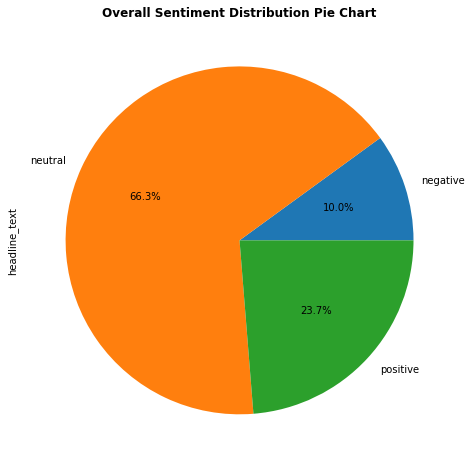

In [ ]:
plt.figure(figsize=(8,8))
final_result['headline_text'].plot.pie(autopct='%1.1f%%')
plt.title("Overall Sentiment Distribution Pie Chart",fontweight="bold")
plt.show()

## Creating Hybrid model for stock price/performance prediction using numerical analysis of historical stock prices, and sentimental analysis of news headlines

In [ ]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 3.9 MB/s 


In [ ]:
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble._forest import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
stock_data=pd.read_csv('/content/LT.NS2.csv')
stock_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-07-01,40.111111,40.724445,40.111111,40.435555,30.959587,3709080.0
1,2002-07-02,40.555553,40.933334,40.444443,40.533333,31.034466,2500024.0
2,2002-07-03,40.688889,40.755554,40.022221,40.080002,30.687366,1910772.0
3,2002-07-04,40.244446,40.377777,39.835556,39.924442,30.568254,1515924.0
4,2002-07-05,39.799999,40.222221,39.799999,40.022221,30.643120,1038928.0


In [ ]:
stock_data['Date'] = pd.to_datetime(stock_data['Date'],format='%Y-%m-%d')

In [ ]:
news_data=pd.read_csv('/content/drive/MyDrive/Datasets/india-news-headlines.csv')
news_data.head()

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic


In [ ]:
news_data.rename(columns={'publish_date': 'Date'},inplace = True)
news_data.head()

,Date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic


In [ ]:
news_data['Date'] = pd.to_datetime(news_data['Date'],format='%Y%m%d')

In [ ]:
news_data.head()

,Date,headline_category,headline_text
0,2001-01-02,unknown,Status quo will not be disturbed at Ayodhya; s...
1,2001-01-02,unknown,Fissures in Hurriyat over Pak visit
2,2001-01-02,unknown,America's unwanted heading for India?
3,2001-01-02,unknown,For bigwigs; it is destination Goa
4,2001-01-02,unknown,Extra buses to clear tourist traffic


In [ ]:
hybrid_data = stock_data.merge(news_data, 
                   on='Date', 
                   how ='inner'
                   )

In [ ]:
hybrid_data.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,headline_category,headline_text
0,2002-07-01,40.111111,40.724445,40.111111,40.435555,30.959587,3709080.0,unknown,Traffic management necessary
1,2002-07-01,40.111111,40.724445,40.111111,40.435555,30.959587,3709080.0,unknown,Fee hike in English medium schools.
2,2002-07-01,40.111111,40.724445,40.111111,40.435555,30.959587,3709080.0,unknown,BSC recruitment
3,2002-07-01,40.111111,40.724445,40.111111,40.435555,30.959587,3709080.0,unknown,Union Club rout Deodhar XI by an innings
4,2002-07-01,40.111111,40.724445,40.111111,40.435555,30.959587,3709080.0,unknown,Sanghvi; Daresh make steady progress
5,2002-07-01,40.111111,40.724445,40.111111,40.435555,30.959587,3709080.0,city.hyderabad,Naxalites blast CPI leader's house
6,2002-07-01,40.111111,40.724445,40.111111,40.435555,30.959587,3709080.0,entertainment.hindi.bollywood,Gracy signs a Prakash Jha film
7,2002-07-01,40.111111,40.724445,40.111111,40.435555,30.959587,3709080.0,edit-page,Sacred Space
8,2002-07-01,40.111111,40.724445,40.111111,40.435555,30.959587,3709080.0,edit-page,Incredible Journey To Immortality
9,2002-07-01,40.111111,40.724445,40.111111,40.435555,30.959587,3709080.0,edit-page,Dream Sequence


In [ ]:
def analysis_polarity(headline):
    result = TextBlob(headline)
    
    if result.sentiment.polarity < 0:
        return 'negative'
    elif result.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'positive'

In [ ]:
hybrid_data['sentiment'] = np.array([analysis_polarity(headline) for headline in hybrid_data['headline_text']])
hybrid_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,headline_category,headline_text,sentiment
0,2002-07-01,40.111111,40.724445,40.111111,40.435555,30.959587,3709080.0,unknown,Traffic management necessary,neutral
1,2002-07-01,40.111111,40.724445,40.111111,40.435555,30.959587,3709080.0,unknown,Fee hike in English medium schools.,neutral
2,2002-07-01,40.111111,40.724445,40.111111,40.435555,30.959587,3709080.0,unknown,BSC recruitment,neutral
3,2002-07-01,40.111111,40.724445,40.111111,40.435555,30.959587,3709080.0,unknown,Union Club rout Deodhar XI by an innings,neutral
4,2002-07-01,40.111111,40.724445,40.111111,40.435555,30.959587,3709080.0,unknown,Sanghvi; Daresh make steady progress,positive


In [ ]:
senti_data = pd.get_dummies(hybrid_data['sentiment'],drop_first=True)


In [ ]:
hybrid_data = pd.concat([hybrid_data,senti_data],axis=1)


In [ ]:
hybrid_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,headline_category,headline_text,sentiment,neutral,positive
0,2002-07-01,40.111111,40.724445,40.111111,40.435555,30.959587,3709080.0,unknown,Traffic management necessary,neutral,1,0
1,2002-07-01,40.111111,40.724445,40.111111,40.435555,30.959587,3709080.0,unknown,Fee hike in English medium schools.,neutral,1,0
2,2002-07-01,40.111111,40.724445,40.111111,40.435555,30.959587,3709080.0,unknown,BSC recruitment,neutral,1,0
3,2002-07-01,40.111111,40.724445,40.111111,40.435555,30.959587,3709080.0,unknown,Union Club rout Deodhar XI by an innings,neutral,1,0
4,2002-07-01,40.111111,40.724445,40.111111,40.435555,30.959587,3709080.0,unknown,Sanghvi; Daresh make steady progress,positive,0,1


In [ ]:
#Functions to get the subjectivity and polarity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return  TextBlob(text).sentiment.polarity

In [ ]:
#Adding subjectivity and polarity columns
hybrid_data['Subjectivity'] =hybrid_data['headline_text'].apply(getSubjectivity)
hybrid_data['Polarity'] = hybrid_data['headline_text'].apply(getPolarity)
hybrid_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,headline_category,headline_text,sentiment,neutral,positive,Subjectivity,Polarity
0,2002-07-01,40.111111,40.724445,40.111111,40.435555,30.959587,3709080.0,unknown,Traffic management necessary,neutral,1,0,1.0,0.000000
1,2002-07-01,40.111111,40.724445,40.111111,40.435555,30.959587,3709080.0,unknown,Fee hike in English medium schools.,neutral,1,0,0.0,0.000000
2,2002-07-01,40.111111,40.724445,40.111111,40.435555,30.959587,3709080.0,unknown,BSC recruitment,neutral,1,0,0.0,0.000000
3,2002-07-01,40.111111,40.724445,40.111111,40.435555,30.959587,3709080.0,unknown,Union Club rout Deodhar XI by an innings,neutral,1,0,0.0,0.000000
4,2002-07-01,40.111111,40.724445,40.111111,40.435555,30.959587,3709080.0,unknown,Sanghvi; Daresh make steady progress,positive,0,1,0.5,0.166667


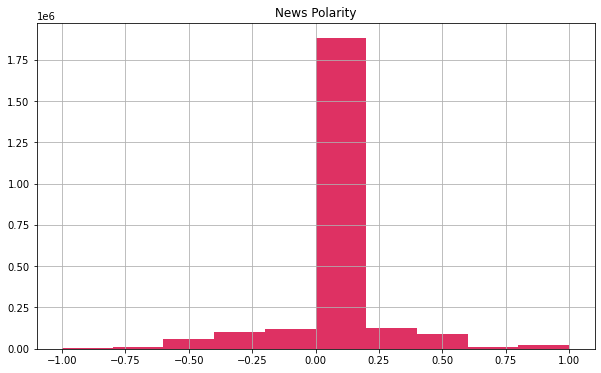

In [ ]:
plt.figure(figsize = (10,6))
plt.title('News Polarity')
hybrid_data['Polarity'].hist(color = '#DE3163')

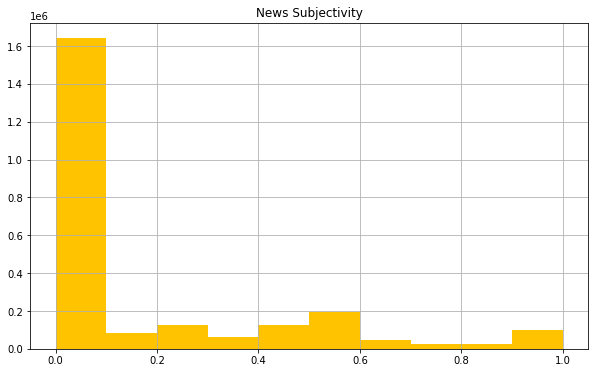

In [ ]:
plt.figure(figsize = (10,6))
plt.title('News Subjectivity')
hybrid_data['Subjectivity'].hist(color = '#FFC300')

In [ ]:
senti_int_an = SentimentIntensityAnalyzer()

hybrid_data['Compound'] = [senti_int_an.polarity_scores(v)['compound'] for v in hybrid_data['headline_text']]
hybrid_data['Negative'] = [senti_int_an.polarity_scores(v)['neg'] for v in hybrid_data['headline_text']]
hybrid_data['Neutral'] = [senti_int_an.polarity_scores(v)['neu'] for v in hybrid_data['headline_text']]
hybrid_data['Positive'] = [senti_int_an.polarity_scores(v)['pos'] for v in hybrid_data['headline_text']]
hybrid_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,headline_category,headline_text,sentiment,neutral,positive,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,2002-07-01,40.111111,40.724445,40.111111,40.435555,30.959587,3709080.0,unknown,Traffic management necessary,neutral,1,0,1.0,0.000000,0.0000,0.0,1.000,0.000
1,2002-07-01,40.111111,40.724445,40.111111,40.435555,30.959587,3709080.0,unknown,Fee hike in English medium schools.,neutral,1,0,0.0,0.000000,0.0000,0.0,1.000,0.000
2,2002-07-01,40.111111,40.724445,40.111111,40.435555,30.959587,3709080.0,unknown,BSC recruitment,neutral,1,0,0.0,0.000000,0.0000,0.0,1.000,0.000
3,2002-07-01,40.111111,40.724445,40.111111,40.435555,30.959587,3709080.0,unknown,Union Club rout Deodhar XI by an innings,neutral,1,0,0.0,0.000000,0.0000,0.0,1.000,0.000
4,2002-07-01,40.111111,40.724445,40.111111,40.435555,30.959587,3709080.0,unknown,Sanghvi; Daresh make steady progress,positive,0,1,0.5,0.166667,0.4215,0.0,0.588,0.412


In [ ]:
hybrid_data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'headline_category', 'headline_text', 'sentiment', 'neutral',
       'positive', 'Subjectivity', 'Polarity', 'Compound', 'Negative',
       'Neutral', 'Positive'],
      dtype='object')

In [ ]:
req_col = [ 'Open',  'High', 'Low','Volume','Compound', 'Negative', 'Neutral' ,'Positive','positive']


In [ ]:
new_hybrid = hybrid_data[req_col]
new_hybrid.reset_index(inplace = True)

In [ ]:
new_hybrid.rename(columns = {'positive':'Label'}, inplace = True)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
new_hybrid.head()

,index,Open,High,Low,Volume,Compound,Negative,Neutral,Positive,Label
0,0,40.111111,40.724445,40.111111,3709080.0,0.0000,0.0,1.000,0.000,0
1,1,40.111111,40.724445,40.111111,3709080.0,0.0000,0.0,1.000,0.000,0
2,2,40.111111,40.724445,40.111111,3709080.0,0.0000,0.0,1.000,0.000,0
3,3,40.111111,40.724445,40.111111,3709080.0,0.0000,0.0,1.000,0.000,0
4,4,40.111111,40.724445,40.111111,3709080.0,0.4215,0.0,0.588,0.412,1


In [ ]:
new_hybrid.shape

(2424136, 10)

## Training and Testing

In [ ]:
X = new_hybrid.drop('Label', axis=1)    

y = new_hybrid['Label']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)


In [ ]:
np.any(np.isnan(x_train))

True

In [ ]:
np.all(np.isfinite(x_train))

False

In [ ]:
x_train = x_train.fillna(x_train.mean())

In [ ]:
x_test=x_test.fillna(x_test.mean())

In [ ]:
logit = LogisticRegression()
logit.fit(x_train,y_train)
y_logit_pred = logit.predict(x_test)
accuracy_score(y_test,y_logit_pred)

0.814375407360961

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_dt_pred = dt.predict(x_test)
accuracy_score(y_test,y_dt_pred)

0.7685364706658856

In [ ]:
lda = LinearDiscriminantAnalysis()
lda.fit(x_train, y_train)
y_lda_pred = lda.predict(x_test)
accuracy_score(y_test,y_lda_pred)

0.8176837971404292

In [ ]:
adb = AdaBoostClassifier()
adb.fit(x_train, y_train)
y_adb_pred = adb.predict(x_test)
accuracy_score(y_test,y_adb_pred)

0.8322023480492051

In [ ]:
xgb = GradientBoostingClassifier()
xgb.fit(x_train, y_train)
y_xgb_pred = xgb.predict(x_test)
accuracy_score(y_test,y_xgb_pred)

0.8339122327918355

In [ ]:
print("Accuracy of Logistic Regression Model: ",accuracy_score(y_test,y_logit_pred)*100,"%")

print("Accuracy of Decision Tree Model      : ",accuracy_score(y_test,y_dt_pred)*100,"%")
print("Accuracy of Linear Discriminant Mode  : ",accuracy_score(y_test,y_lda_pred)*100,"%")
print("Accuracy of AdaBoost Model           : ",accuracy_score(y_test,y_adb_pred)*100,"%")
print("Accuracy of Gradient Boosting Model  : ",accuracy_score(y_test,y_xgb_pred)*100,"%")

Accuracy of Logistic Regression Model:  81.43754073609611 %
Accuracy of Decision Tree Model      :  76.85364706658856 %
Accuracy of Linear Discriminant Mode  :  81.76837971404292 %
Accuracy of AdaBoost Model           :  83.22023480492051 %
Accuracy of Gradient Boosting Model  :  83.39122327918355 %


In [ ]:
from sklearn.ensemble._forest import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=150)
rf.fit(x_train,y_train)
y_rf_pred = rf.predict(x_test)
accuracy_score(y_test,y_rf_pred)


0.7928461227486862

In [ ]:
print("Accuracy of Random forest Model      : ",accuracy_score(y_test,y_rf_pred)*100,"%")

Accuracy of Random forest Model      :  79.28461227486862 %


Conclusion:
Six different Neural Network models were used to carry out the analysis and prediction of stock price/performance, trained with Hybrid data generated from Numerical data (i.e. Stock price history of L&T)) and Textual data (i.e.India News Headlines data).

Results
Accuracy of Logistic Regression Model:  81.43754073609611 %

Accuracy of Decision Tree Model      :  76.85364706658856 %

Accuracy of Random forest Model      :  79.28461227486862 %

Accuracy of Linear Discriminant Mode  :  81.76837971404292 %

Accuracy of AdaBoost Model           :  83.22023480492051 %

Accuracy of Gradient Boosting Model  :  83.39122327918355 %

Gradient Boosting and AdaBoot give the best results in terms of accuracy as compared to all other models.